In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

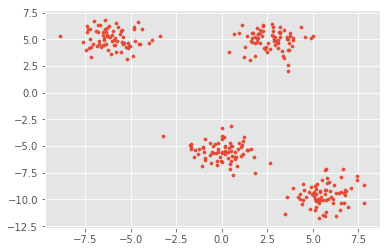

In [8]:
from sklearn.datasets.samples_generator import make_blobs
# make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None) 
# Returns
# X : array of shape [n_samples, n_features]
#     The generated samples.
# y : array of shape [n_samples]
#     The integer labels for cluster membership of each sample.
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=10)

In [11]:
import cv2 as cv
# criteria :
# cv2.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached. 
# cv2.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter. 
# cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
plt.figure(figsize=(10,6))
# flags : This flag is used to specify how initial centers are taken. 
# Normally two flags are used for this : cv2.KMEANS_PP_CENTERS and cv2.KMEANS_RANDOM_CENTERS.
flags = cv.KMEANS_RANDOM_CENTERS

<Figure size 720x432 with 0 Axes>

In [12]:
import numpy as np
# attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. 
# The algorithm returns the labels that yield the best compactness. This compactness is returned as output.
compactness, labels, centers = cv.kmeans(X.astype(np.float32), 4, None, criteria, 10, flags)
# Output parameters
#         compactness : It is the sum of squared distance from each point to their corresponding centers.
#         labels : This is the label array (same as ‘code’ in previous article) where each element marked ‘0’, ‘1’.....
#         centers : This is array of centers of clusters.

In [13]:
compactness

526.6774351084605

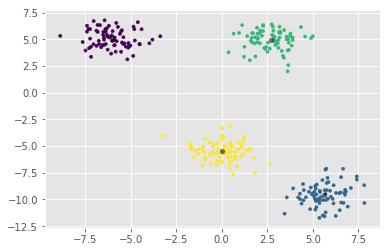

In [14]:
# in Numpy, list[:, N] means listing all N-th element in each list
plt.scatter(X[:,0], X[:, 1], c=labels[:,0], s=10)
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=20, alpha=0.5);

In [15]:
# Understanding maximizing expectation method 
# 1. start from random cluster center
# 2. repeat till convergence
#     - expectation step : assign every data point to closest cluster center
#     - optimization step : calculate the mean of every points in cluster, update cluster center

In [16]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=5):
#   1. initialize
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
#   2. continuous repeat
    while True:
        labels = pairwise_distances_argmin(X, centers)
#   3. find new cluster center
        new_centers = np.array([X[labels == i].mean(axis=0)
                           for i in range(n_clusters)
                           ])
#   4. confirm the convergence, if need, stop while loop
        if np.all(centers == new_centers):
            break
        centers = new_centers
#   5. close function, return result
    return centers, labels

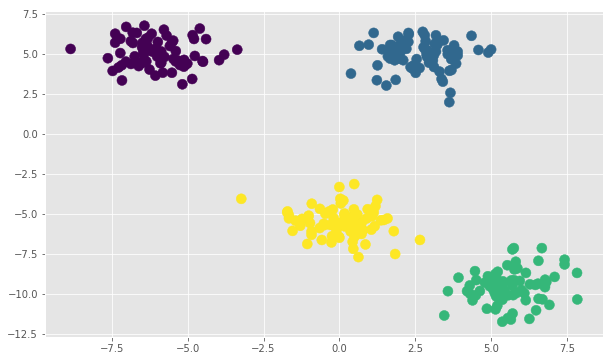

In [17]:
centers, labels = find_clusters(X, 4)
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100)

In [18]:
'''
limitaion of maximizing expectation
- cannot curtain maximizing expectation method is the best way
- need to know the number of cluster in advance
- final boundary of algorithm is linear
- algorithm is slow when large data set
'''

'\nlimitaion of maximizing expectation\n- cannot curtain maximizing expectation method is the best way\n- need to know the number of cluster in advance\n- final boundary of algorithm is linear\n- algorithm is slow when large data set\n'

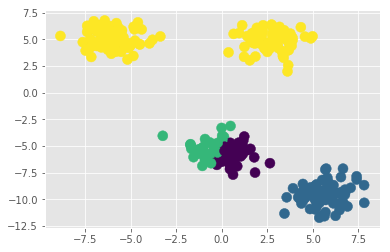

In [19]:
'''
- 1st Warning : Difficulty of finding global optimization result.
                Random initializing is the problem.
'''
centers, labels = find_clusters(X, 4, rseed=10)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis');

In [20]:
'''
- 2st Warning : Select the number of cluster in advance.
                There are no wrong or meaningless cluster from k-means point of view.
                - elbow method : compare compactness
                - silhouette analysis
                - Gaussian mixture model
                - DBSCAN               
'''

'\n- 2st Warning : Select the number of cluster in advance.\n                There are no wrong or meaningless cluster from k-means point of view.\n                - elbow method : compare compactness\n                - silhouette analysis\n                - Gaussian mixture model\n                - DBSCAN               \n'

Text(0,0.5,'compactness')

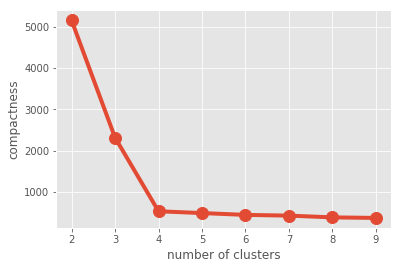

In [24]:
kvals = np.arange(2, 10)
compactness = []
for k in kvals:
    c, _, _ = cv.kmeans(X.astype(np.float32), k, None, criteria, 10, flags)
    compactness.append(c)
plt.plot(kvals, compactness, 'o-', linewidth=4,
        markersize=12)
plt.xlabel('number of clusters')
plt.ylabel('compactness')

In [25]:
'''
- 3st Warning : boundary of cluster is linear
    Assumption : the point is more closer to its cluster than other clusters.
'''

'\n- 3st Warning : boundary of cluster is linear\n    Assumption : the point is more closer to its cluster than other clusters.\n'

In [27]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=12)

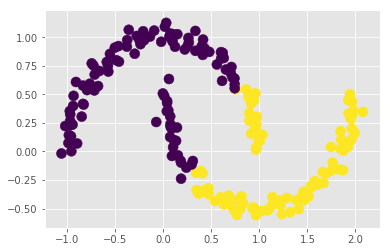

In [38]:
criteria = (cv.TERM_CRITERIA_EPS + 
            cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv.kmeans(X.astype(np.float32), 
                                         2, None, criteria, 
                                         10, flags)
plt.scatter(X[:, 0], X[:, 1], c=labels[:, 0], s=100, cmap='viridis')

In [ ]:
'''
    As you can see, k-means cannot recognize two semi-circle and devide data by line 
'''

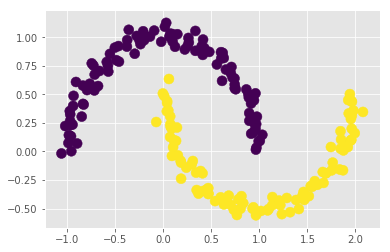

In [46]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labels = model.fit_predict(X)
# labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis')

In [ ]:
'''
    - 4st Warning : Slow when large samples.
'''